# Spotify Genre Classification 

Before we get started, let's define our workflow. Workflow can keep your works as works. It could helps you to do a effective or efficient jobs. There are plenty of workflow, and it's absolutely up to you to choose what workflow to use. In this case, let's use the most common ML workflow as described below
![](res/workflow-oreilly.png)
*source: https://www.oreilly.com/ideas/how-graph-algorithms-improve-machine-learning*

We will call the second process as "Exploratory Data Analysis", and will not do a loop for further analysis. 


# Data Load

In [63]:
import pandas as pd
data = pd.read_csv('data/SpotifyFeatures.csv')
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Exploratory Data Analysis

## Inspect Structure
First thing to do with our data, is to take a peek onto its structure. Let's use info, describe, and head to see it. 

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
genre               232725 non-null object
artist_name         232725 non-null object
track_name          232725 non-null object
track_id            232725 non-null object
popularity          232725 non-null int64
acousticness        232725 non-null float64
danceability        232725 non-null float64
duration_ms         232725 non-null int64
energy              232725 non-null float64
instrumentalness    232725 non-null float64
key                 232725 non-null object
liveness            232725 non-null float64
loudness            232725 non-null float64
mode                232725 non-null object
speechiness         232725 non-null float64
tempo               232725 non-null float64
time_signature      232725 non-null object
valence             232725 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 32.0+ MB


In [65]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [66]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


If you already read the previous notebook, you might notice that most of the features are the same. The only feature that haven't introduced are `genre`. But since it's so clear, that `genre` contains string denoting the genre of the music, we will not discuss any further. If you are not familiar with the feature, or haven't read previous notebook, please take a look on [Spotify Data Collection and Analysis]()

## Feature Drop

In this notebook, the goal is to classify music's genre by it's audio feature. So we don't need `artist_name`, `track_name`, and `track_id` as they have nothing to do with the genre. What about `duration_ms`? by theory, there is a relation between genre and duration. You can see it whether this feature affect model's performance in feature importance. <span style="background-color:lightgreen">Update 1: Feature Importance</span>

Now, let's drop them off

In [67]:
unused_col = ['artist_name', 'track_name', 'track_id']
df = data.drop(columns=unused_col).reset_index(drop=True)

In [68]:
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## Feature Engineering

Now, we need our data to be able to be applied with mathematical expressions (since that how machine learning do that). So, let's change several feature values and cast them into numerical.

In [69]:
df.select_dtypes(exclude='number').head()

,genre,key,mode,time_signature
0,Movie,C#,Major,4/4
1,Movie,F#,Minor,4/4
2,Movie,C,Minor,5/4
3,Movie,C#,Major,4/4
4,Movie,F,Major,4/4


In [70]:
df['time_signature'].unique().tolist()

['4/4', '5/4', '3/4', '1/4', '0/4']

If you remember from the previous notebook, the `time_signature` are ranging from 3 to 7. I assume changing its value into the first numeric value (ie: 4/4 -> 4) won't remove the informations, because all the signature have and supposed to be have the same denominator. 

In [71]:
df['mode'].unique().tolist()

['Major', 'Minor']

Let's change the value of Major -> 1 and Minor -> 0. Even if it's not a numerical, but since it's only have 2 value, we can change it into binary (0,1). With 0 means the absence of Major (wich means Minor), and 1 means the occurence of Major

In [72]:
df['key'].unique().tolist()

['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B']

<span style="background-color:lightgreen">Update #2 : Citation</span>

In music theory, the basic scale used are chromatic scale, wich divide the tone into 12 keys (C, C#, D, D#, E, F, F#, G, G#, A, A#, B). Let's not argue of why it should be 12, why not 5, 9, etc. But if you are curious enough, you may visit Daniel White's dissertation: [Potential Mathematical Models for the Western Musical Scale](https://www.skytopia.com/music/theory/scale-dissertation.html), or his [blogpost](https://www.skytopia.com/project/scale.html)


Since it contains the value of order, we can safely transform the key into numerical representations. 
Let's say, 1 to 12.

In [73]:
mode_dict = {'Major' : 1, 'Minor' : 0}
key_dict = {'C' : 1, 'C#' : 2, 'D' : 3, 'D#' : 4, 'E' : 5, 'F' : 6, 
        'F#' : 7, 'G' : 9, 'G#' : 10, 'A' : 11, 'A#' : 12, 'B' : 12}

df['time_signature'] = df['time_signature'].apply(lambda x : int(x[0]))
df['mode'].replace(mode_dict, inplace=True)
df['key'] = df['key'].replace(key_dict).astype(int)

df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390


Let's save this into a module so that we can use it later on the same dataset (saved on `scripts/preprocessing.py`)

## Correlation
The easiest way to see data's correlation is by look into its pairplot. Pairplot gives you a brief information about correlation between two features and each feature's distribution.

In [74]:
import seaborn as sns
# sns.pairplot(df) #it may take a while since the data is pretty large

![](res/pairplot.png)

If we pairplot the features (not the genre), we can see that most of the features have a little correlations (based on the plot). 

<span style="background-color:lightgreen">Update 3: Pairplot Insight</span>

Look closer to `key`, `mode`, and `time_signature`. The variance are highly condensed on specific value. This is because `key`, `mode`, and `time_signature` was previously a categorical value so there won't be any values other than that converted values. On the other hand, most of the feature forms a random scatter, wich is good because we don't want any feature have correlation. 

But, there are few feature that creates a pattern. Let's say `loudness - energy` creates sigmoidal pattern. `duration - popularity` and `duration-tempo` creates normal-like distribution.

We can, let's say, drop the `loudness-energy-populairty-tempo`. But wich one? we will later see from feature importance. Let's drop it later to conclude the hypothesis that the absence of those feature can cure the performance.  


## Check for missing values

In [75]:
df.isna().sum().sum()

0

## Check for duplicates

<span style="background-color:lightgreen">Update 5: Duplicates Check and why top-5 (multiclass) measurement matters</span>

Each row of this data represents a song. However, there are songs that labelled into multiple genre. Take a look at this data

In [86]:
duplicated_all = data[data.duplicated(subset = 'track_id', keep=False)]
duplicated = data[data.duplicated(subset = 'track_id', keep='first')]

In [87]:
data[data['track_id'] == duplicated['track_id'].iloc[0]]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
77710,Children’s Music,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
93651,Indie,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
113770,Pop,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


Imagine, if you're going to classify same data characterisics over a different classes. Isn't that frustate you ? well, this goes the same with our model later. This is **current limitation** of spotify dataset API. AFAIK, They don't provide a multilabel data on genre, at least, until this notebook was created.  

In [88]:
print(f'''Unique Duplicates: {duplicated.shape[0]}
Total Duplicates: {duplicated_all.shape[0]}
Total Data: {data.shape[0]}
Duplicates %: {round(duplicated_all.shape[0]/data.shape[0]*100, 2)}''')

Unique Duplicates: 55951
Total Duplicates: 91075
Total Data: 232725
Duplicates %: 39.13


How bad is our model perform on this type of dataset that contains total 39% of duplicates? Let's see it later. For now, let's just use the data as it is. 

# Class Balance



In [90]:
data['genre'].value_counts()/len(data)

Comedy              0.041598
Soundtrack          0.041448
Indie               0.041005
Jazz                0.040567
Pop                 0.040331
Electronic          0.040292
Children’s Music    0.040189
Folk                0.039957
Hip-Hop             0.039940
Rock                0.039841
Alternative         0.039802
Classical           0.039772
Rap                 0.039669
World               0.039085
Soul                0.039055
Blues               0.038771
R&B                 0.038638
Anime               0.038397
Reggaeton           0.038359
Ska                 0.038131
Reggae              0.037688
Dance               0.037387
Country             0.037228
Opera               0.035578
Movie               0.033542
Children's Music    0.023216
A Capella           0.000511
Name: genre, dtype: float64

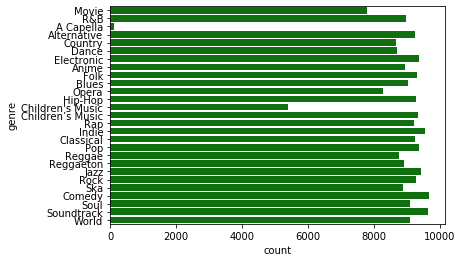

In [98]:
sns.countplot(y="genre", data=data, color='green')

<span style="background-color:lightgreen">Update 6: Class Balance</span>

Based on the class frequency, there's a huge different of value in `A Capella` Class. Other classes reach at least 2.3% of the data. But `A Capella` only reach 0.05% of the data. This is highly imbalance for `A Capella`. We will later see the effect of class-balancing on model's performance. 

# Data Preparation

## Cross Validation

In [16]:
from sklearn.model_selection import train_test_split
import time

In [17]:
X = df.drop(columns=['genre'])
y = df['genre']
random_state = 11
test_size = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [18]:
y_train.value_counts().sort_index()

A Capella             94
Alternative         7372
Anime               7145
Blues               7260
Children's Music    4356
Children’s Music    7530
Classical           7373
Comedy              7742
Country             6982
Dance               6938
Electronic          7547
Folk                7439
Hip-Hop             7390
Indie               7637
Jazz                7495
Movie               6263
Opera               6663
Pop                 7477
R&B                 7232
Rap                 7458
Reggae              6986
Reggaeton           7090
Rock                7479
Ska                 7053
Soul                7318
Soundtrack          7598
World               7263
Name: genre, dtype: int64

In [19]:
y_valid.value_counts().sort_index()

A Capella             25
Alternative         1891
Anime               1791
Blues               1763
Children's Music    1047
Children’s Music    1823
Classical           1883
Comedy              1939
Country             1682
Dance               1763
Electronic          1830
Folk                1860
Hip-Hop             1905
Indie               1906
Jazz                1946
Movie               1543
Opera               1617
Pop                 1909
R&B                 1760
Rap                 1774
Reggae              1785
Reggaeton           1837
Rock                1793
Ska                 1821
Soul                1771
Soundtrack          2048
World               1833
Name: genre, dtype: int64

# Modelling and Training

In this case, let's use LogisticRegression. Even it's not best suited with multi class problem, let's just try how it works.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', max_iter=200)

With the `multi_class = 'multinomial'` means in multiclass case (like our data), the loss is measured using cross entropy. The`solver='lbfgs'` are merekly optimizer, like `gradient_descent`. For further information, don't hesitate to go to [Sklearn's Page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

# Evaluation

In [22]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = model.predict(X_valid)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

C:\Users\dzul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                  precision    recall  f1-score   support

       A Capella       0.00      0.00      0.00        25
     Alternative       0.00      0.00      0.00      1891
           Anime       0.11      0.24      0.15      1791
           Blues       0.00      0.00      0.00      1763
Children's Music       0.00      0.00      0.00      1047
Children’s Music       0.04      0.02      0.02      1823
       Classical       0.29      0.17      0.22      1883
          Comedy       0.12      0.01      0.03      1939
         Country       0.00      0.00      0.00      1682
           Dance       0.00      0.00      0.00      1763
      Electronic       0.07      0.27      0.12      1830
            Folk       0.04      0.00      0.00      1860
         Hip-Hop       0.00      0.00      0.00      1905
           Indie       0.01      0.00      0.00      1906
            Jazz       0.06      0.12      0.08      1946
           Movie       0.19      0.01      0.01      1543
           Op

It's amazing to see such a performance. Let's try other baseline 

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [26]:
y_rfc = rfc.predict(X_valid)

In [27]:
print(classification_report(y_valid, y_rfc))

                  precision    recall  f1-score   support

       A Capella       1.00      0.20      0.33        25
     Alternative       0.15      0.12      0.13      1891
           Anime       0.62      0.58      0.60      1791
           Blues       0.36      0.38      0.37      1763
Children's Music       0.74      0.76      0.75      1047
Children’s Music       0.03      0.04      0.03      1823
       Classical       0.60      0.59      0.60      1883
          Comedy       0.97      0.95      0.96      1939
         Country       0.34      0.39      0.36      1682
           Dance       0.11      0.10      0.11      1763
      Electronic       0.50      0.53      0.51      1830
            Folk       0.18      0.20      0.19      1860
         Hip-Hop       0.12      0.13      0.13      1905
           Indie       0.04      0.04      0.04      1906
            Jazz       0.34      0.31      0.33      1946
           Movie       0.58      0.53      0.55      1543
           Op

Now, it's clear that the data might need more complex model and data engineering. Well done, data.
We will come back later. 

You might wondering of why is it such a disaster. Well, first of all, it's a multi-class problem. Don't compare with binomial problem. The second thing is, we did't do a deep feature selection/extraction. And the third, is what you should guest on the first time. Duplicates. The data contains duplicates. It's true that one track could be labeled as multiple genres. This same data on the different classes will confuse our classifier, and ruin our metric score unless we use **top5** approach. 

## Feature Importance
<span style="background-color:lightgreen">Update 1, 5: Feature Importace on DT</span>
There's so many way to do a feature importance. In some models like `random forest`, they already have built-in feature importance measurement. In Logistic Regression case, we will try to use **Recusive Feature Eliminiation (RFE)**. 

In [55]:
from sklearn.feature_selection import RFE
selector = RFE(model, n_features_to_select=1)
selector.fit(X_train, y_train)

C:\Users\dzul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dzul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dzul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dzul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dzul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=200,
                                 multi_class='multinomial', n_jobs=None,
                                 penalty='l2', random_state=None,
                                 solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [56]:
print(f"Model's Feature Importance")
for i in range(len(selector.ranking_)):
    print(f"#{i+1}: {X.columns[selector.ranking_[i]-1]} ")

Model's Feature Importance
#1: loudness 
#2: danceability 
#3: acousticness 
#4: valence 
#5: energy 
#6: duration_ms 
#7: tempo 
#8: key 
#9: speechiness 
#10: mode 
#11: popularity 
#12: time_signature 
#13: liveness 
#14: instrumentalness 


From feature importance using sklearn's RFE above, we can say that <span style="background-color:lightgreen">duration have greater impact to model's performance</span> compared to most of the feature like `key`, `speechiness`, `mode`, etc 

# Model Improvement

## Class Rebalancing 

In [236]:
def rebalance(data):
    from tqdm import tqdm
    # remove `a capella class`
    data = data[data['genre'] != 'A Capella']
    # set maximum occurence of data
    max_val = 5400 
    # create new dataframe 
    _data = pd.DataFrame(columns=data.columns)
    
    # iteratively add sample of songs based on genre 
    for genre in tqdm(data['genre'].unique()):
        _data = _data.append(data[data['genre'] == genre].sample(n=max_val, random_state=1), ignore_index=True, sort=False)  
    return _data

In [267]:
balanced_df = rebalance(data).drop(columns=unused_col).reset_index(drop=True)
balanced_df['duration_ms'] = balanced_df['duration_ms'].astype(int)
balanced_df['time_signature'] = balanced_df['time_signature'].apply(lambda x : int(x[0]))
balanced_df['mode'].replace(mode_dict, inplace=True)
balanced_df['key'] = balanced_df['key'].replace(key_dict).astype(int)
balanced_df['popularity'] = balanced_df['popularity'].astype(int)
X_train, X_valid, y_train, y_valid = train_test_split(balanced_df.drop(columns='genre'),balanced_df['genre'], test_size=0.2, random_state=1)

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 14.70it/s]


In [268]:
lrm_rebalance = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', max_iter=200).fit(X_train, y_train)

In [269]:
print(classification_report(y_valid, lrm_rebalance.predict(X_valid)))

C:\Users\dzul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                  precision    recall  f1-score   support

     Alternative       0.08      0.05      0.07      1113
           Anime       0.28      0.29      0.29      1091
           Blues       0.07      0.00      0.00      1043
Children's Music       0.45      0.61      0.52      1070
Children’s Music       0.11      0.05      0.07      1102
       Classical       0.30      0.38      0.33      1095
          Comedy       0.17      0.07      0.10      1029
         Country       0.09      0.19      0.12      1081
           Dance       0.19      0.04      0.07      1074
      Electronic       0.14      0.11      0.13      1060
            Folk       0.13      0.09      0.11      1090
         Hip-Hop       0.08      0.07      0.08      1042
           Indie       0.15      0.03      0.06      1094
            Jazz       0.16      0.17      0.16      1140
           Movie       0.36      0.16      0.23      1135
           Opera       0.41      0.62      0.49      1114
             

This is not proper to say (since it's not apple-to-apple), but as you can see, training the data over a balanced data could gives better performance. 

## Removing highly correlated Feature

In [272]:
from script import visualization as sv 

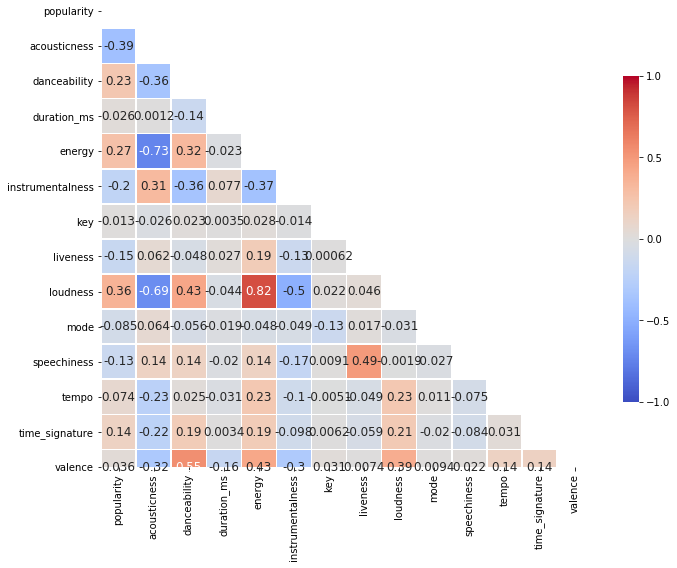

In [273]:
sv.corr_heatmap(balanced_df)

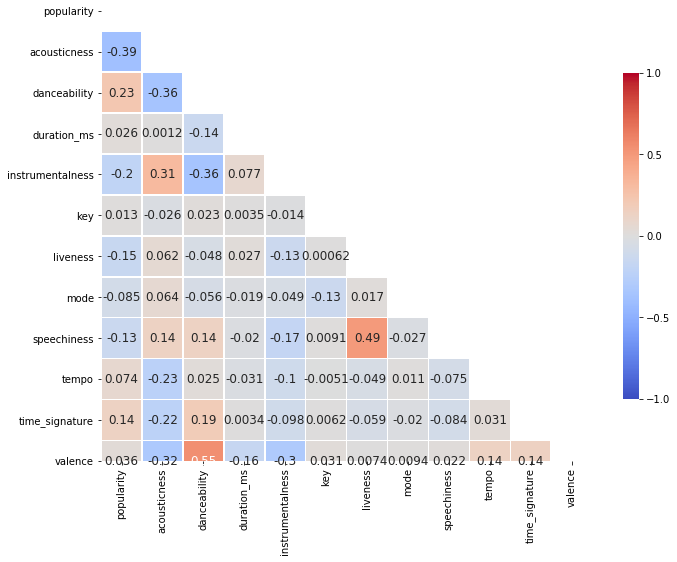

In [311]:
# sv.corr_heatmap(balanced_df.drop(columns=['energy']))
sv.corr_heatmap(balanced_df.drop(columns=['energy', 'loudness']))

In [313]:
X_train, X_valid, y_train, y_valid = train_test_split(balanced_df.drop(columns=['genre', 'energy', 'loudness']),balanced_df['genre'], test_size=0.2, random_state=1)
lrm_cor = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', max_iter=200).fit(X_train, y_train)

In [314]:
print(classification_report(y_valid, lrm_cor.predict(X_valid)))

C:\Users\dzul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                  precision    recall  f1-score   support

     Alternative       0.06      0.03      0.04      1113
           Anime       0.17      0.08      0.11      1091
           Blues       0.00      0.00      0.00      1043
Children's Music       0.38      0.66      0.48      1070
Children’s Music       0.08      0.03      0.04      1102
       Classical       0.27      0.14      0.18      1095
          Comedy       0.17      0.05      0.08      1029
         Country       0.08      0.21      0.12      1081
           Dance       0.12      0.01      0.02      1074
      Electronic       0.00      0.00      0.00      1060
            Folk       0.09      0.06      0.07      1090
         Hip-Hop       0.07      0.08      0.07      1042
           Indie       0.10      0.01      0.03      1094
            Jazz       0.14      0.18      0.16      1140
           Movie       0.34      0.20      0.25      1135
           Opera       0.28      0.48      0.36      1114
             

This conclude that removing highly correlated feature are good for cost-saving. But somehow, it may be considered important by the model and can cause a differ in model's performance.

## Removing Unimportant Feature

We have previously calculate Model's Feature Importance (Descending):
1. loudness 
2. danceability 
3. acousticness 
4. valence 
5. energy 
6. duration_ms 
7. tempo 
8. key 
9. speechiness 
10. mode 
11. popularity 
12. time_signature 
13. liveness 
14. instrumentalness 

Now let's try to drop 6

In [381]:
X_train, X_valid, y_train, y_valid = train_test_split(balanced_df.drop(columns=['genre', 'loudness', 'danceability', 'acousticness', 'valence', 'energy', 'duration_ms']),balanced_df['genre'], test_size=0.2, random_state=1)
lrm_uf = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', max_iter=200).fit(X_train, y_train)

C:\Users\dzul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [382]:
print(classification_report(y_valid, lrm_uf.predict(X_valid)))

                  precision    recall  f1-score   support

     Alternative       0.12      0.03      0.05      1113
           Anime       0.23      0.17      0.19      1091
           Blues       0.11      0.08      0.09      1043
Children's Music       0.48      0.71      0.58      1070
Children’s Music       0.06      0.01      0.01      1102
       Classical       0.18      0.15      0.16      1095
          Comedy       0.69      0.91      0.79      1029
         Country       0.12      0.37      0.18      1081
           Dance       0.09      0.06      0.07      1074
      Electronic       0.15      0.08      0.10      1060
            Folk       0.09      0.11      0.10      1090
         Hip-Hop       0.12      0.12      0.12      1042
           Indie       0.09      0.00      0.00      1094
            Jazz       0.26      0.04      0.07      1140
           Movie       0.19      0.08      0.12      1135
           Opera       0.34      0.44      0.38      1114
             

In [384]:
rfc = RandomForestClassifier(n_estimators=30, random_state=42)
print(classification_report(y_valid, rfc.fit(X_train, y_train).predict(X_valid)))

                  precision    recall  f1-score   support

     Alternative       0.10      0.09      0.10      1113
           Anime       0.31      0.28      0.29      1091
           Blues       0.23      0.25      0.24      1043
Children's Music       0.62      0.68      0.65      1070
Children’s Music       0.03      0.03      0.03      1102
       Classical       0.32      0.29      0.31      1095
          Comedy       0.96      0.94      0.95      1029
         Country       0.26      0.32      0.29      1081
           Dance       0.09      0.09      0.09      1074
      Electronic       0.30      0.35      0.32      1060
            Folk       0.13      0.14      0.13      1090
         Hip-Hop       0.14      0.17      0.15      1042
           Indie       0.05      0.04      0.04      1094
            Jazz       0.22      0.16      0.19      1140
           Movie       0.45      0.29      0.35      1135
           Opera       0.61      0.69      0.65      1114
             

There is a big improvement in Logistic Regression's performance. The accuracy jumped from 11 to 21%. This is not big, but it's signifficant. Unlike random forest wich decreased by 6%. Why is it? This is because by default random forest could do a feature selection by itself. Removing the feature means decreasing it's ability as bootstrap aggregator which indirectily and collectively measure and weighting the features. 

## Altering the classification test measurement to top-5 prediciton approach

Let's say, we have a prediction. A probability one. 

In [386]:
preds = lrm_uf.predict_proba(X_valid)
preds[0]

array([9.18817683e-02, 6.07094997e-03, 3.28983046e-02, 3.36333578e-05,
       7.70898543e-02, 7.11419165e-03, 8.74033873e-04, 1.04782064e-01,
       5.11436374e-02, 3.33734644e-02, 9.67833147e-02, 4.91941909e-02,
       7.25233042e-02, 3.27260041e-02, 6.57877036e-04, 7.68050226e-04,
       1.36225479e-02, 6.02119136e-02, 3.59362509e-02, 2.30204500e-02,
       2.95746103e-02, 6.07292382e-02, 1.54503189e-02, 6.06940354e-02,
       8.00041293e-03, 3.48455785e-02])

If we use normal prediction measurement, the prediction will be class '7', or in the real class name, it will be 'Country', and Considered True if the ground truth is 'Country', or False if the ground truth is not 'Country'. 

In [387]:
preds[0].argmax()

7

In [389]:
lrm_uf.classes_[preds[0].argmax()]

'Country'

In [390]:
print(f"""Predicted Class\t: {lrm_cor.classes_[preds[0].argmax()]}
Ground Truth\t: {y_valid.values[0]}
Correctness\t: {lrm_cor.classes_[preds[0].argmax()] == y_valid.values[0]}
""")

Predicted Class	: Country
Ground Truth	: Alternative
Correctness	: False



As you expected, in the dataset where there exist multiple data with different classes, using normal method for classifiation is not fair. By using top-n approach, we collect top-n probability. If, in those n classes exist a True Positive/ground truth class, the prediction is considered Correct. Normally, this measurement only valid for accuracy (just like what Imagenet demonstrated). See the example below

In [391]:
preds[0].argsort()[::-1][:5]

array([ 7, 10,  0,  4, 12], dtype=int64)

In [392]:
lrm_uf.classes_[preds[0].argsort()[::-1][:5]]

array(['Country', 'Folk', 'Alternative', 'Children’s Music', 'Indie'],
      dtype=object)

In [393]:
print(f"""Predicted Class\t: {lrm_cor.classes_[preds[0].argsort()[::-1][:5]]}
Ground Truth\t: {y_valid.values[0]}
Correctness\t: {y_valid.values[0] in lrm_cor.classes_[preds[0].argsort()[::-1][:5]] }
""")

Predicted Class	: ['Country' 'Folk' 'Alternative' 'Children’s Music' 'Indie']
Ground Truth	: Alternative
Correctness	: True



In [401]:
preds_proba = lrm_uf.predict_proba(X_valid)

In [409]:
def top5score(preds, ground_truth, model):
    if not len(preds) == len(ground_truth):
        raise exception('Shape Mismatch')
    
    mdfd_pred = []
    for i in range(len(preds)):
        preds_classes = model.classes_[preds[i].argsort()[::-1][:5]]
        if ground_truth[i] in preds_classes :
            mdfd_pred.append(ground_truth[i])
        else:
            mdfd_pred.append(preds_classes[0])
    return mdfd_pred

In [410]:
preds_proba[0]

array([9.18817683e-02, 6.07094997e-03, 3.28983046e-02, 3.36333578e-05,
       7.70898543e-02, 7.11419165e-03, 8.74033873e-04, 1.04782064e-01,
       5.11436374e-02, 3.33734644e-02, 9.67833147e-02, 4.91941909e-02,
       7.25233042e-02, 3.27260041e-02, 6.57877036e-04, 7.68050226e-04,
       1.36225479e-02, 6.02119136e-02, 3.59362509e-02, 2.30204500e-02,
       2.95746103e-02, 6.07292382e-02, 1.54503189e-02, 6.06940354e-02,
       8.00041293e-03, 3.48455785e-02])

In [412]:
mdfd_pred = top5score(preds_proba, y_valid.values, lrm_uf)

In [415]:
print(classification_report(y_valid,mdfd_pred ))

                  precision    recall  f1-score   support

     Alternative       0.71      0.40      0.51      1113
           Anime       0.79      0.72      0.75      1091
           Blues       0.64      0.61      0.62      1043
Children's Music       0.89      0.92      0.90      1070
Children’s Music       0.87      0.49      0.62      1102
       Classical       0.74      0.64      0.69      1095
          Comedy       0.84      0.94      0.89      1029
         Country       0.27      0.59      0.37      1081
           Dance       0.64      0.61      0.62      1074
      Electronic       0.69      0.53      0.60      1060
            Folk       0.43      0.51      0.47      1090
         Hip-Hop       0.61      0.68      0.64      1042
           Indie       0.98      0.38      0.55      1094
            Jazz       0.88      0.55      0.68      1140
           Movie       0.94      0.79      0.86      1135
           Opera       0.78      0.84      0.81      1114
             

After altering the classification measurement to top-5, the performance jumped greatly into 63%. Again, this is not a good performance. But against multiple classes, it's quite a good try. 

The original top-5 error was used in Imagenet Competition. [See the Paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) if you're interested.

# Summary
Rebalancing the data gives better performance. Removing highly correlated feature/variable may reducing the cost, but can also affect model's performance. Removing unimportant feature taken from the model. However, Random Forest has its own feuature selection and feature importance that just work better if we gives more feature. Altering the clasificatoin method into top-5 also can cure the model's performance